# Chapter 5 - Algorithms for supervised learning 
The following exercises test your familiarity with the content of chapter 5. The corresponding tutorial notebook was quite heavy including a walkthrough of building logit and tree models from scratch. Given the algorithm-heavy tutorial, we opted for a somewhat light exercise session that basically allows you to verify some of the claims made in the lecture. Specifically, the exercise revisits the lecture part on linear and logistic regression for classification. After completing the exercises, you will have gained even more confidence in logistic regression being the better approach for classification and, and this is maybe the main point of the tasks, further improved your Python programming skills.

Have fun with the following tasks.

## Exercise 1: 
We established in the lecture, that the linear regression model is not suitable for classification problems. Let's test this claim empirically.

### 1.1 Synthetic data
Create a synthetic data set for binary classification using the sklearn function `make_classification()`. We want to plot the data later. So use only two input variables.

In [14]:
import numpy as np

np.random.seed(888)

# Create synthetic data for classification using sklearn
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=500)

# Always useful to remind oneself of the dimensions of a data set
print("Shape of X {}".format(X.shape))  
print("Shape of y {}".format(y.shape))

Shape of X (500, 2)
Shape of y (500,)


### 1.2 Linear regression
We discussed the analytical solution to the least-squares loss minimization problem in the lecture. To recall, using our standard notation, we can compute the regression parameters $\beta$ by 
$$ \beta^* = \left( X^{\top} X \right)^{-1}  X^{\top}  y $$

Calculate $\beta^*$ using plain numpy. Recall you need to augment $X$ with a column of ones to ensure that your regression model includes an intercept.  

In [15]:

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print("Shape of X {}".format(X.shape))  

Shape of X (500, 3)


In [16]:
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
print(beta)

[ 0.50752505  0.36587229 -0.01333707]


In [17]:
# Compare with the estimation from sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.intercept_)
print(reg.coef_[1:])

# They are same with the beta using plain numpy

0.5075250520193639
[ 0.36587229 -0.01333707]


### 1.3 Plotting
Create a chart that depicts your data set. Use different colors for the data points of the two classes. Also plot the decision surface that corresponds to your regression model from task 1.2.

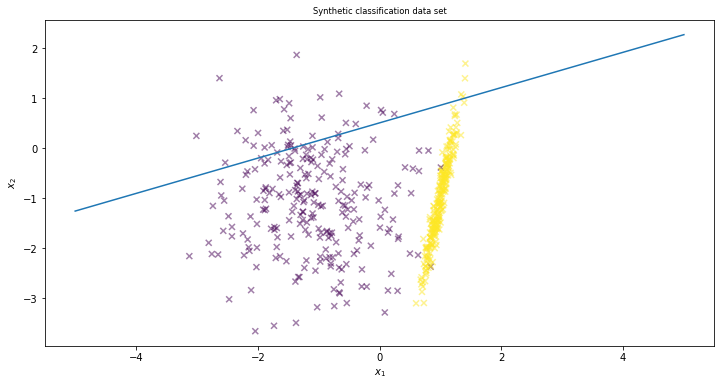

In [18]:
import matplotlib.pyplot as plt

# Set parameters for plotting
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)

# Generate data points
x_1 = np.linspace(-5, 5)  # we plot the hyperplane for this range of values
x_2 = np.linspace(-5, 5)
y_1 = beta[0] + beta[1] * x_1 + beta[2] * x_2  # evaluate our above equation

# Ready to plot our hyperplane
fig = plt.figure()
#ax = plt.axes(projection='3d')

#ax.plot3D(x_1, x_2, y, 'gray')
plt.plot(x_1,y_1);
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");
plt.title("Synthetic classification data set", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], c=y, alpha=.5, marker='x');

### 1.4 Residuals
Compute and plot the residuals of your linear regression model. Inspecting the graph, how do you judge the adequacy of the linear regression model for the data at hand.

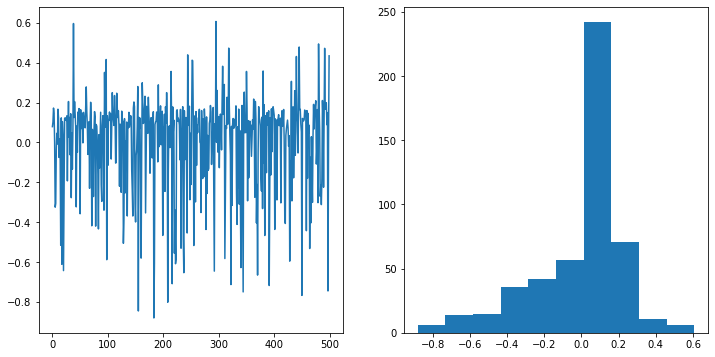

In [19]:
e=[]
e = y-np.dot(X,beta)

# Plot the residuals
plt.subplot(1,2,1)
plt.plot(e);
plt.subplot(1,2,2)
plt.hist(e);

#from solution:The first plot in 1.3 already showed that the linear regression model is not adequate for the task
#at hand. Considering the two above plots, the magnitude of residuals may be taken as evidence that the model 
#does not give a good fit. Further, we can easily verify that the magnitude of predictions exceeds the zero-one 
#rage, which inevitably causes unnecessarily large residuals.

### 1.5 Logistic regression
Now estimate a logistic regression model for your synthetic data set using standard sklearn functionality. Reproduce the plot from task 1.3 and incorporate the class boundary from the logistic model in the plot. It should also include the result from the linear regression. By visual inspection, does the logit model give a better fit? Briefly state your opinion. 

In [20]:
from sklearn.linear_model import LogisticRegression

sk_logit = LogisticRegression(penalty='none', fit_intercept=False)  # Recall that we already included a constant column in X. 
sk_logit.fit(X, y)                                                  # So we must set fit_intercept to False

LogisticRegression(fit_intercept=False, penalty='none')

In [21]:
beta2 = sk_logit.coef_
beta2[0]

array([-24.78241152,  26.61485453,  -3.69512447])

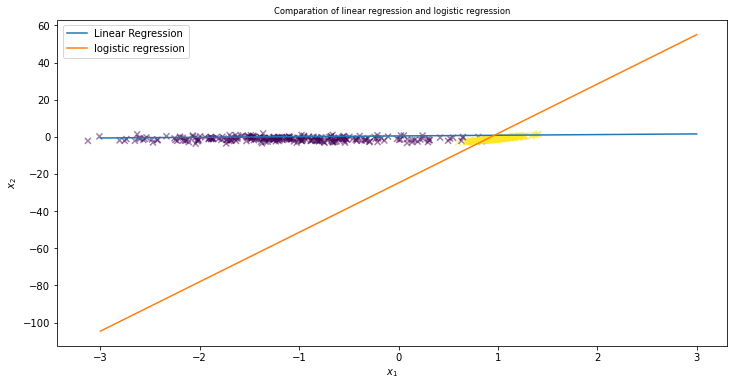

In [28]:
# Generate data points
x_1 = np.linspace(-3, 3)  # we plot the hyperplane for this range of values
x_2 = np.linspace(-0.01, 0.01)

y_1 = beta[0] + beta[1] * x_1 + beta[2] * x_2  # evaluate our above equation
y_2 = beta2[0][0] + beta2[0][1] * x_1 + beta2[0][2] * x_2

# Ready to plot our hyperplane
fig = plt.figure()
#ax = plt.axes(projection='3d')

#ax.plot3D(x_1, x_2, y, 'gray')
plt.plot(x_1,y_1,label='Linear Regression')
plt.plot(x_1,y_2,label = 'logistic regression')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Comparation of linear regression and logistic regression", fontsize='small')
plt.scatter(X[:, 1], X[:, 2], c=y, alpha=.5, marker='x')
plt.legend()

In [64]:
# By visual inspection, logit model give a better fit